# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [21]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [22]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

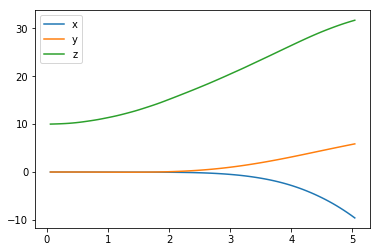

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

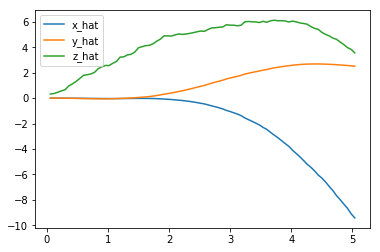

In [24]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

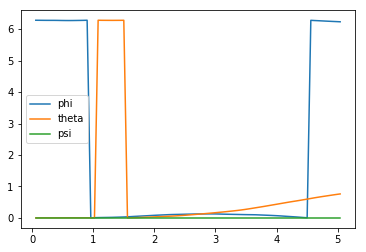

In [25]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

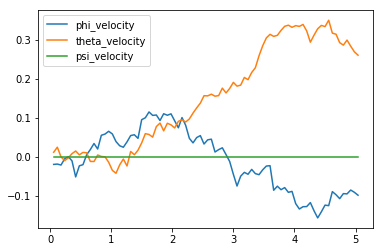

In [26]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

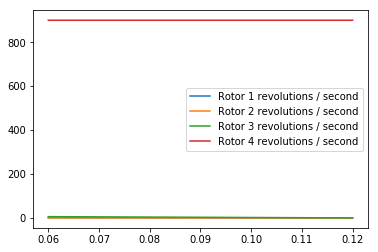

In [59]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [28]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -9.58848513   5.87735973  31.70364828   6.23420166   0.76224371   0.        ]
[-9.42753031  2.51759438  3.56363501]
[-0.09891866  0.26125123  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [29]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = 3251.630 (best = 3268.270), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [58]:
## TODO: Train your agent here.
from agents.agent import Agent
import numpy as np
from task import Task
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 500

# Quadcopter stands still at the ground and has as target a height of 150 above the sarting point
init_pos = np.array([0., 0., 0., 0., 0., 0.])
target_pos = np.array([0., 0., 150.])
task = Task(init_pose=init_pos, target_pos=target_pos,runtime=10.)
agent = Agent(task)

# save rewards for plotting
rewards = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    step = 0
    while True:
        step +=1
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            rewards.append(agent.score)
            print("\r\nEp={:4d}, score={:7.3f} (top={:7.3f}) pos={} {} {} {} {} {} {}".format(
                i_episode,
                agent.score,
                agent.top_score,
                round(task.sim.pose[:3][0],2),
                round(task.sim.pose[:3][1],2),
                round(task.sim.pose[:3][2],2),
                round(task.sim.pose[3:6][0],2),
                round(task.sim.pose[3:6][1],2),
                round(task.sim.pose[3:6][2],2),
                round(abs(task.sim.v).sum()),2), end="")  # [debug]
            break
    sys.stdout.flush()


Ep=   1, score=635.141 (top=635.141) pos=-0.43 0.01 0.0 0.37 0.97 0.0 4.0
Ep=   2, score=635.141 (top=635.141) pos=-0.43 0.01 0.0 0.37 0.97 0.0 4.0
Ep=   3, score=434.187 (top=635.141) pos=-0.14 0.0 0.0 0.2 1.52 0.0 3.0
Ep=   4, score=434.187 (top=635.141) pos=-0.14 0.0 0.0 0.2 1.52 0.0 3.0
Ep=   5, score=100.566 (top=635.141) pos=-0.01 -0.0 0.0 0.15 5.12 0.0 2.0
Ep=   6, score=100.566 (top=635.141) pos=-0.01 -0.0 0.0 0.15 5.12 0.0 2.0
Ep=   7, score=434.187 (top=635.141) pos=-0.14 0.0 0.0 0.2 1.52 0.0 3.0
Ep=   8, score=635.141 (top=635.141) pos=-0.43 0.01 0.0 0.37 0.97 0.0 4.0
Ep=   9, score=100.566 (top=635.141) pos=-0.01 -0.0 0.0 0.15 5.12 0.0 2.0
Ep=  10, score=200.590 (top=635.141) pos=-0.04 -0.01 0.0 0.47 3.18 0.0 2.0
Ep=  11, score=635.141 (top=635.141) pos=-0.43 0.01 0.0 0.37 0.97 0.0 4.0
Ep=  12, score=200.590 (top=635.141) pos=-0.04 -0.01 0.0 0.47 3.18 0.0 2.0
Ep=  13, score=100.566 (top=635.141) pos=-0.01 -0.0 0.0 0.15 5.12 0.0 2.0
Ep=  14, score=100.566 (top=635.141) pos=

Ep= 103, score=76453.291 (top=76454.302) pos=2.75 0.9 268.32 0.01 6.24 0.0 30.0
Ep= 104, score=76453.643 (top=76454.302) pos=-0.24 1.7 268.34 0.01 6.28 0.0 29.0
Ep= 105, score=76453.093 (top=76454.302) pos=0.98 3.2 268.31 0.03 6.27 0.0 30.0
Ep= 106, score=76453.220 (top=76454.302) pos=1.13 -0.25 268.35 6.28 6.27 0.0 29.0
Ep= 107, score=76453.581 (top=76454.302) pos=-1.89 -0.41 268.34 6.27 0.01 0.0 29.0
Ep= 108, score=76453.121 (top=76454.302) pos=0.9 1.41 268.34 0.01 6.27 0.0 29.0
Ep= 109, score=76453.027 (top=76454.302) pos=-2.03 -3.04 268.3 6.25 0.03 0.0 30.0
Ep= 110, score=76454.176 (top=76454.302) pos=-0.75 0.27 268.35 0.01 0.01 0.0 29.0
Ep= 111, score=76453.796 (top=76454.302) pos=0.14 1.26 268.35 0.01 6.28 0.0 29.0
Ep= 112, score=76452.943 (top=76454.302) pos=-2.53 -1.27 268.32 6.27 0.03 0.0 30.0
Ep= 113, score=76453.554 (top=76454.302) pos=1.1 1.38 268.34 0.02 6.27 0.0 29.0
Ep= 114, score=76453.894 (top=76454.302) pos=-0.31 0.98 268.35 0.01 0.01 0.0 29.0
Ep= 115, score=76453.168

Ep= 203, score=76453.801 (top=76454.302) pos=0.06 1.54 268.34 0.02 0.01 0.0 29.0
Ep= 204, score=76453.135 (top=76454.302) pos=1.17 0.65 268.35 0.0 6.28 0.0 29.0
Ep= 205, score=76453.922 (top=76454.302) pos=0.04 1.78 268.34 0.03 6.27 0.0 29.0
Ep= 206, score=76453.233 (top=76454.302) pos=-0.81 -1.3 268.34 6.27 6.28 0.0 29.0
Ep= 207, score=76453.352 (top=76454.302) pos=-1.04 -1.04 268.34 6.27 0.02 0.0 29.0
Ep= 208, score=76454.200 (top=76454.302) pos=-0.4 -0.09 268.35 0.0 0.01 0.0 28.0
Ep= 209, score=76452.367 (top=76454.302) pos=1.62 -1.65 268.34 6.27 6.27 0.0 29.0
Ep= 210, score=76453.653 (top=76454.302) pos=-0.76 1.58 268.34 0.01 0.01 0.0 29.0
Ep= 211, score=76452.642 (top=76454.302) pos=-1.55 -2.21 268.33 6.27 0.01 0.0 29.0
Ep= 212, score=76452.958 (top=76454.302) pos=3.49 0.45 268.31 6.28 6.24 0.0 30.0
Ep= 213, score=76453.448 (top=76454.302) pos=0.63 2.06 268.34 0.02 6.27 0.0 29.0
Ep= 214, score=76454.328 (top=76454.328) pos=-0.25 0.33 268.35 0.01 0.01 0.0 29.0
Ep= 215, score=76453.

Ep= 303, score=76453.271 (top=76454.388) pos=-0.08 1.28 268.35 6.27 6.27 0.0 29.0
Ep= 304, score=76451.881 (top=76454.388) pos=2.53 -2.46 268.32 6.26 6.27 0.0 30.0
Ep= 305, score=76452.658 (top=76454.388) pos=-1.58 -2.1 268.33 6.26 0.01 0.0 29.0
Ep= 306, score=76454.232 (top=76454.388) pos=-0.26 0.01 268.35 0.01 0.01 0.0 29.0
Ep= 307, score=76452.668 (top=76454.388) pos=0.63 -4.31 268.29 6.24 6.28 0.0 30.0
Ep= 308, score=76453.499 (top=76454.388) pos=-1.07 -0.71 268.35 6.28 0.01 0.0 29.0
Ep= 309, score=76453.026 (top=76454.388) pos=-0.72 -1.24 268.35 6.28 0.0 0.0 29.0
Ep= 310, score=76453.656 (top=76454.388) pos=1.19 1.02 268.34 0.01 6.27 0.0 29.0
Ep= 311, score=76453.556 (top=76454.388) pos=0.44 1.2 268.35 0.01 6.28 0.0 29.0
Ep= 312, score=76452.373 (top=76454.388) pos=2.05 -1.31 268.33 6.26 6.26 0.0 29.0
Ep= 313, score=76453.018 (top=76454.388) pos=-1.71 -3.41 268.3 6.25 0.03 0.0 30.0
Ep= 314, score=76452.352 (top=76454.388) pos=2.83 -1.14 268.32 6.28 6.25 0.0 30.0
Ep= 315, score=764

Ep= 403, score=76453.161 (top=76454.388) pos=-0.94 -4.12 268.3 6.25 0.01 0.0 30.0
Ep= 404, score=76452.665 (top=76454.388) pos=-1.63 -2.76 268.32 6.26 0.01 0.0 30.0
Ep= 405, score=76452.208 (top=76454.388) pos=1.62 -2.14 268.33 6.26 6.27 0.0 29.0
Ep= 406, score=76452.849 (top=76454.388) pos=1.3 -1.82 268.33 6.26 6.27 0.0 29.0
Ep= 407, score=76453.901 (top=76454.388) pos=0.09 0.76 268.35 0.01 0.01 0.0 29.0
Ep= 408, score=76454.182 (top=76454.388) pos=-1.57 0.33 268.34 0.01 0.02 0.0 29.0
Ep= 409, score=76452.815 (top=76454.388) pos=-1.93 -2.08 268.33 6.27 0.03 0.0 30.0
Ep= 410, score=76453.353 (top=76454.388) pos=1.74 0.43 268.34 0.01 6.27 0.0 29.0
Ep= 411, score=76453.588 (top=76454.388) pos=-0.49 2.83 268.33 0.02 0.02 0.0 29.0
Ep= 412, score=76453.086 (top=76454.388) pos=3.07 -0.06 268.32 6.28 6.25 0.0 29.0
Ep= 413, score=76452.287 (top=76454.388) pos=3.33 -1.02 268.31 0.0 6.25 0.0 30.0
Ep= 414, score=76453.122 (top=76454.388) pos=1.53 2.33 268.32 0.03 6.26 0.0 30.0
Ep= 415, score=7645

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

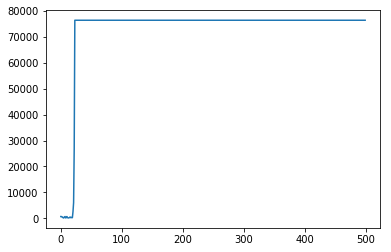

In [60]:
import matplotlib.pyplot as plt

## TODO: Plot the rewards.
plt.plot(rewards, label='rewards')

## Testing Optimal Policy

Now that we have trained our model we can test it in a simulation to see how it performs over the duration of an episode in relation to change in position, velocity, angles and rotor speed. Using the provided code from earlier we can run the new optimal policy.

In [61]:
#Modify the values below to give the quadcopter a different starting position.
runtime = 25.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode() # start a new episode
    while True:
        rotor_speeds = agent.act(state)
        next_state, reward, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        state = next_state
        if done:
            break

### Positional analysis

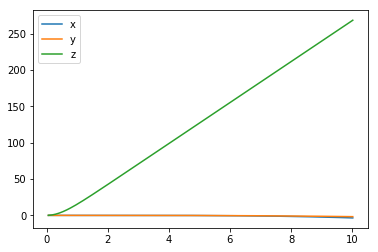

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

### Velocity analysis

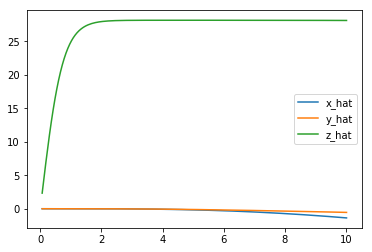

In [63]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

### Angle analysis

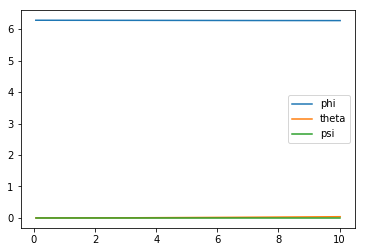

In [64]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

### Rotor speed analysis

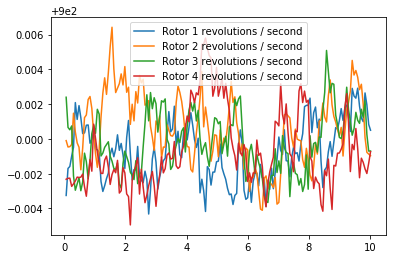

In [65]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

In this project I designed a test to see whether the RL algorithm could learn to fly a quadcopter to a position of [0,0,150]. The test would use episodes of 10 seconds in length and be run over 1000 iterations.

In order to incentivise behaviour towards the target goal I. included several reward and penalties as part of the overall Reward Function:

#### Penalties

* I penalised the agent for the absolute distance away from the target on the x, y and z axis. As the target was to achieve a target of 150 on the z axis I weighted the penalty relating to the z-axis to be greater than the x and y equivalents. I initially chose a weight of ten times the absolute value, however I increased this to 12 as this seemed to improve the model's performance in this task.


* I included a second penalty for uneven flying by taking the sum of the absolute value of all of the angles and using this as the penalty.


* I eventually included a final penalty that attempted to penalise the agent for being both far away from the target and travelling fast to try and encourage the agent to get close to the target whilst travelling at a more steady/controlled speed.

#### Rewards

* I included a reward for every period of time the quadcopter was airborne to encourage the agent to take-off.


* I then attempted to include a reward for every period of time it flew close to the target. I initially had this as a sum of the square roots of the squared errors for each axis. However, I found this encourage the agent to find unexpected locations where it could be rewarded e.g. [150,0,0] or [0,150,0]. To avoid this I changed this reward formula so that each axis needs to be within a certain limit (<10) of it's target value for it receive the additional reward.


#### Total

Initially I created the total by taking the penalties from the rewards, however this resulted in a large negative value so I played with the weighting of the total penalties in this formula, eventually settling on 0.02% of the penalties.

#### **Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

For this continuous space problem with a discrete action space I used the recommended Deep Deterministic Policy Gradients (DDPG) reinforcement learning algorithm. 

For the Actor in my algorithm I found that the neural network provided as part of the DDPG code worked well. The neural network has three layers (of sizes 32, 64, 32) each making use of relu activation. The final output layer once again uses sigmoid activation to produce a vector of values between 0 and 1. Because of this we then make use of a scalar function to transform these [0,1] outputs for each action dimension to the proper range.

For my Critic code I used a two pathway version, one for the state and one for the action. Both made use of a two layer network of (size 32, 64) with relu activation functions. The combined network was then passed through another relu activation function. Finally an output layer was added to calculate the Q values, and the whole network made use of an Adam optimisation.

I tried several different combinations of hyperparameters, however the ones that worked best for my model were:

* theta - 0.15
* sigma - 0.001
* gamma - 0.99
* tau - 0.1

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

This task appeared relatively difficult task to learn given there were four different actions that the agent is having to coordinate at any one time. After training my agent over many sets of 1000 episodes there was a common pattern of an aha moment with then some incremental learning as opposed to a gradual learning over the duration of the episodes.

The agent learns to not move too far in either the x or y-axis as it only gets penalised for these actions. However, the agent consistently flies too high, often reaching the 250-270 mark by the time the episode finishes. I introduced an additional penalty to try and incentivise reducing velocity as the agent nears the target however this only had limited effect.

Looking at the analysis of the optimum policy we can see that the agent has clearly learnt that it gains reward by increasing its position on the z-axis whilst keeping its position stable on the x and y-axis. By doing this it is able to increase the total reward over the 1000 iterations. By analysing the motor speed graph we can also see that the agent has learnt to operate each motor at a similar speed to ensure it minimises the pitch of the quadcopter in a controlled ascent to the target height. However, it never learns to optimise this by honing in on the 150 target value for the z-axis so clearly improvements can be made here.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

This project has been really interesting and I have found the subject of reinforcement learning fascinating. The hardest part of this project was definitely developing a useful reward function that would encourage learning towards the target goal. The majority of my time was spent on optimising this reward function.

I found two things particularly interesting in the agent's behaviours:

1) Firstly that when I was trying to reward time periods where the quadcopter flew close to the target, the agent learnt to optimise this by finding other positions (with large values on the x, or y axis) to maximise this part of the reward function. This showed me where there was a problem with my reward function and I was able to then evolve it to avoid this issue in the future.

2) That the agent has found learnt several of the expected behaviours, however it never learnt to reduce speed once it reached the optimum height but carry on ascending until the end of the time period. It would be interesting to test the agent over a longer time period per episode to see at what point it reduces its velocity to bring the altitude down back towards the target, or whether my reward function is still too weighted towards rewarding flight rather than hovering at a target height.

With more time I would like to continue tailoring the neural network used in the model, run the model over longer time periods per episode and also look at introducing non-linear scalars to the penalty section of the reward function for exceeding the target height.

Overall I have really enjoyed working on this project and I look forward to continuing to develop and optimise this agent in the future.